In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima import auto_arima

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('./data/df2.csv', index_col='DATE')

In [3]:
df.head()

,GVZCLS,VXGDXCLS,BAMLH0A0HYM2,sp500,gold_swing,gold_sc,gold_30
DATE,,,,,,,
2011-09-13,0.663332,0.346779,0.701012,0.035333,1.007752,0.880439,NaN
2011-09-14,0.609024,0.348379,0.694572,0.052700,0.994259,0.879714,NaN
2011-09-15,0.601470,0.343579,0.689052,0.068100,0.986711,0.862056,NaN
2011-09-16,0.589220,0.310821,0.686293,0.023000,1.008999,0.867862,NaN
2011-09-19,0.626786,0.306947,0.700092,-0.039733,0.987342,0.867862,NaN


In [4]:
df.columns

Index(['GVZCLS', 'VXGDXCLS', 'BAMLH0A0HYM2', 'sp500', 'gold_swing', 'gold_sc',
       'gold_30'],
      dtype='object')

In [5]:
adfuller(df['gold_sc'])

(-1.5061692242806803,
 0.5304573342823201,
 4,
 2442,
 {'1%': -3.4330306663366255,
  '5%': -2.862724291785039,
  '10%': -2.56740044647283},
 -17046.035729363037)

In [6]:
df['gold_sc']= df['gold_sc'].diff()
df['gold_30']= df['gold_30'].diff()
df.dropna(inplace=True)

In [7]:
adfuller(df['gold_sc'])

(-26.37188330778206,
 0.0,
 3,
 2413,
 {'1%': -3.433062917583076,
  '5%': -2.8627385335843085,
  '10%': -2.5674080290555596},
 -16869.303323621236)

In [8]:
adfuller(df['gold_30'])

(-8.490533358528777,
 1.317183601582038e-13,
 25,
 2391,
 {'1%': -3.4330879064776165,
  '5%': -2.8627495683023896,
  '10%': -2.567413904149833},
 -31486.406369605356)

In [9]:
adfuller(df['GVZCLS'])

(-4.778232056567874,
 5.9847665224170994e-05,
 3,
 2413,
 {'1%': -3.433062917583076,
  '5%': -2.8627385335843085,
  '10%': -2.5674080290555596},
 -11553.037564668373)

In [10]:
adfuller(df['GVZCLS'])

(-4.778232056567874,
 5.9847665224170994e-05,
 3,
 2413,
 {'1%': -3.433062917583076,
  '5%': -2.8627385335843085,
  '10%': -2.5674080290555596},
 -11553.037564668373)

In [11]:
adfuller(df['VXGDXCLS'])

(-4.151812489859072,
 0.0007942002060505967,
 7,
 2409,
 {'1%': -3.4330674270336785,
  '5%': -2.8627405248963482,
  '10%': -2.5674090892669166},
 -12169.814687646574)

In [12]:
adfuller(df['BAMLH0A0HYM2'])

(-3.329320875815072,
 0.013617633875989575,
 13,
 2403,
 {'1%': -3.4330742193886445,
  '5%': -2.8627435243022283,
  '10%': -2.567410686207021},
 -15840.786070369795)

In [13]:
adfuller(df['sp500'])

(-13.797898426816339,
 8.680421556968649e-26,
 12,
 2404,
 {'1%': -3.4330730849724276,
  '5%': -2.862743023360881,
  '10%': -2.5674104194963467},
 -4960.5679896111415)

In [14]:
adfuller(df['gold_swing'])

(-49.02186363403694,
 0.0,
 0,
 2416,
 {'1%': -3.43305954530467,
  '5%': -2.862737044430077,
  '10%': -2.5674072362026337},
 -17951.48365264544)

In [15]:
df.columns

Index(['GVZCLS', 'VXGDXCLS', 'BAMLH0A0HYM2', 'sp500', 'gold_swing', 'gold_sc',
       'gold_30'],
      dtype='object')

In [16]:
df.shape

(2417, 7)

In [18]:
endog = df['gold_sc']
exog = df.drop(columns=['gold_sc','gold_30','gold_swing'])

In [19]:
exog_train, exog_test, endog_train, endog_test = train_test_split(exog,
                                                    endog,
                                                    test_size = 0.1,
                                                    shuffle=False)

Showing no auto correlation

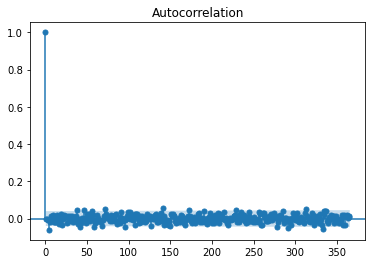

In [44]:
plot_acf(endog, lags=365,alpha=.05);

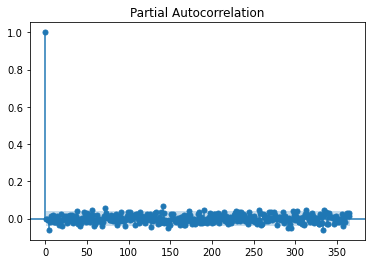

In [45]:
plot_pacf(endog, lags=365,alpha=.05);

Finding benchmark

In [42]:
count = 0
for x in endog_test:
    mean = endog_test.mean()
    count += (x-mean)**2
np.sqrt(count/len(endog_test))

0.008861019070247628

In [20]:
auto_arima(endog, exogenous=exog, trace=True, mean=False).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-17055.804, Time=3.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17061.447, Time=2.50 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-17059.453, Time=1.41 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-17059.455, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-17062.917, Time=1.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-17057.458, Time=2.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 12.235 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2417
Model:                        SARIMAX   Log Likelihood                8536.459
Date:                Mon, 04 Oct 2021   AIC                         -17062.917
Time:                        02:09:08   BIC                         -17033.966
Sample:                             0   HQIC                        -17052.388
                               - 2417                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
GVZCLS          -0.0057      0.002     -3.125      0.002      -0.009      -0.002
VXGDXCLS         0.0003      0.002      0.149      0.881      -0.004       0.005
BAMLH0A0HYM2     0.0043      0.001      3.300      0.001       0.002       0.007
sp500            0.0088      0.001      9.948      0.000       0.007       0.010
sigma2         5.01e-05    7.9e-07     63.394      0.000    4.85e-05    5.16e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4811.15
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.42
Prob(H) (two-sided):                  0.12   Kurtosis:                         9.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

A PDQ of (0,0,0) means my model is hot garbage. I'll graph it to show.
While I would normally not fit the model to all data, it is not possible to do otherwise while using SARIMAX and exog variables.

In [21]:
sarimax1 = SARIMAX(endog, exog=exog, order=(0,0,0))
mod1 = sarimax1.fit(disp=True)
print(mod1.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                gold_sc   No. Observations:                 2417
Model:                        SARIMAX   Log Likelihood                8536.459
Date:                Mon, 04 Oct 2021   AIC                         -17062.917
Time:                        02:09:09   BIC                         -17033.966
Sample:                             0   HQIC                        -17052.388
                               - 2417                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
GVZCLS          -0.0057      0.002     -3.125      0.002      -0.009      -0.002
VXGDXCLS         0.0003      0.002      0.149      0.881      -0.004       0.005
BAMLH0A0HYM2     0.0043      0.001      3.30

In [30]:
train_preds = mod1.predict(start=endog_train.index[0], end=endog_train.index[-1], exog=exog_train)
test_preds = mod1.predict(start=endog_test.index[0], end=endog_test.index[-1],  exog=exog_test)

In [33]:
RMSE1 = mean_squared_error(endog_test, test_preds, squared=False)
print(RMSE1)

0.00878199544142245


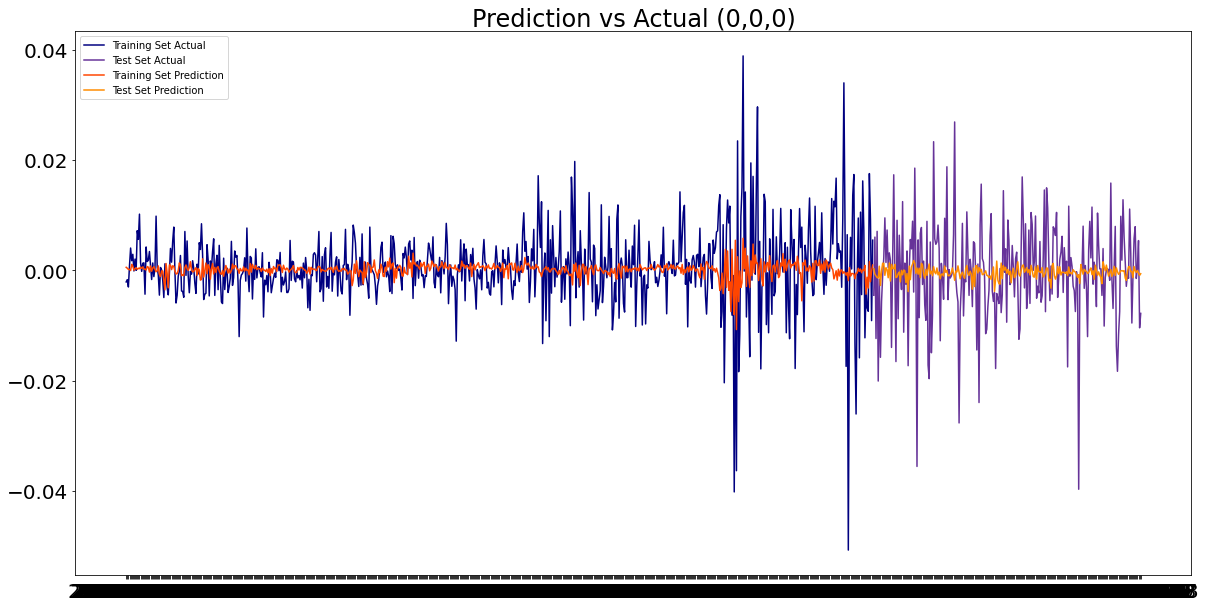

In [32]:
plt.figure(figsize=(20,10))
plt.plot(endog_train.iloc[1500:], color='navy', label='Training Set Actual')
plt.plot(endog_test, color = 'rebeccapurple', label='Test Set Actual')
plt.plot(train_preds.iloc[1500:], color = 'orangered', label='Training Set Prediction')
plt.plot(test_preds, color = 'darkorange', label='Test Set Prediction')

plt.title(label = 'Prediction vs Actual (0,0,0)', fontsize=24)
plt.legend(loc="upper left")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
#plt.savefig('./visuals/sarimax1.png')

0,0,0 model shows poor fit. Predictions are close to mean.

In [34]:
sarimax2 = SARIMAX(endog, exog=exog, order=(1,0,1))
mod2 = sarimax2.fit(disp=True)
print(mod2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                gold_sc   No. Observations:                 2417
Model:               SARIMAX(1, 0, 1)   Log Likelihood                8536.464
Date:                Mon, 04 Oct 2021   AIC                         -17058.928
Time:                        03:01:53   BIC                         -17018.396
Sample:                             0   HQIC                        -17044.187
                               - 2417                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
GVZCLS          -0.0057      0.002     -3.071      0.002      -0.009      -0.002
VXGDXCLS         0.0003      0.002      0.147      0.883      -0.004       0.005
BAMLH0A0HYM2     0.0043      0.001      3.29

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
train_preds = mod2.predict(start=endog_train.index[0], end=endog_train.index[-1], exog=exog_train)
test_preds = mod2.predict(start=endog_test.index[0], end=endog_test.index[-1],  exog=exog_test)

In [36]:
RMSE2 = mean_squared_error(endog_test, test_preds, squared=False)
print(RMSE2)

0.008782024932560166


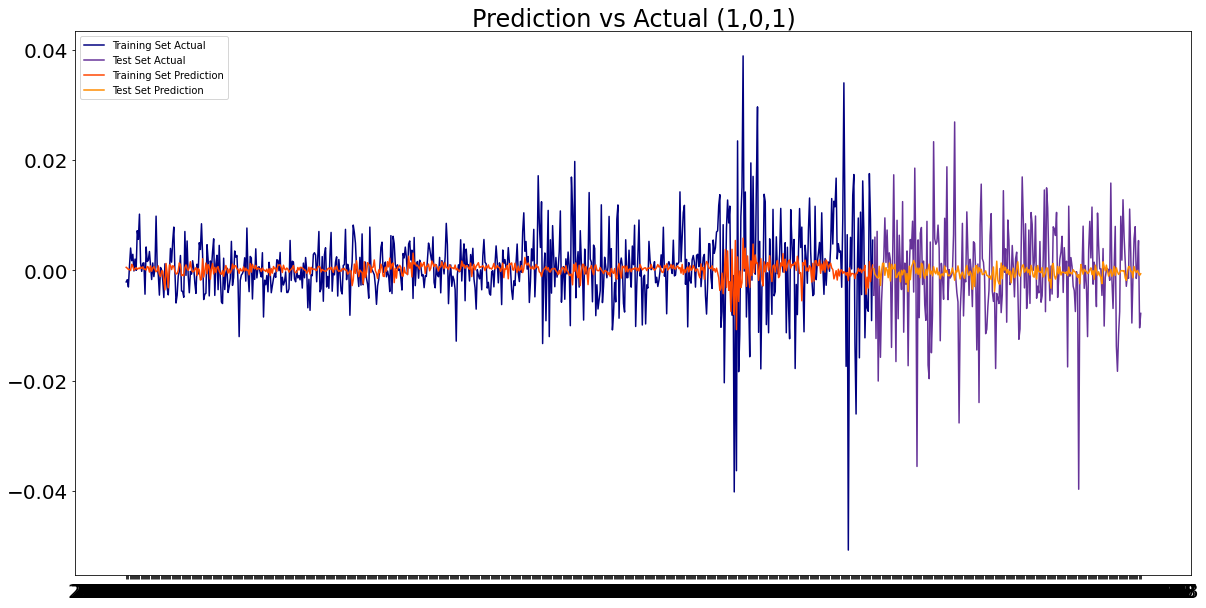

In [37]:
plt.figure(figsize=(20,10))
plt.plot(endog_train.iloc[1500:], color='navy', label='Training Set Actual')
plt.plot(endog_test, color = 'rebeccapurple', label='Test Set Actual')
plt.plot(train_preds.iloc[1500:], color = 'orangered', label='Training Set Prediction')
plt.plot(test_preds, color = 'darkorange', label='Test Set Prediction')

plt.title(label = 'Prediction vs Actual (1,0,1)', fontsize=24)
plt.legend(loc="upper left")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
#plt.savefig('./visuals/sarimax2.png')

I tried very hard to get LSTM to work and kept running into input layer issues. I am keeping this code to return to it in the future for an expansion of the project.

In [24]:
#xt_ltsm = np.reshape(exog_train, (exog_train.shape[0], exog_train.shape[1]))

In [25]:
# #https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f
# # model = Sequential()
# #Adding the first LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (xt_ltsm.shape[1], 1,)))
# model.add(Dropout(0.2))
# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a third LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# # Adding the output layer
# model.add(Dense(units = 1))

# # Compiling the RNN
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# # Fitting the RNN to the Training set
# model.fit(xt_ltsm, endog_train, epochs = 100, batch_size = 256)